# **Análisis de datos**

1. **Tendencias de posiciones a lo largo del tiempo:**

Analiza la posición semanal de una canción en función de la semana (WeekID) para identificar tendencias de ascenso o descenso en el ranking de Billboard.

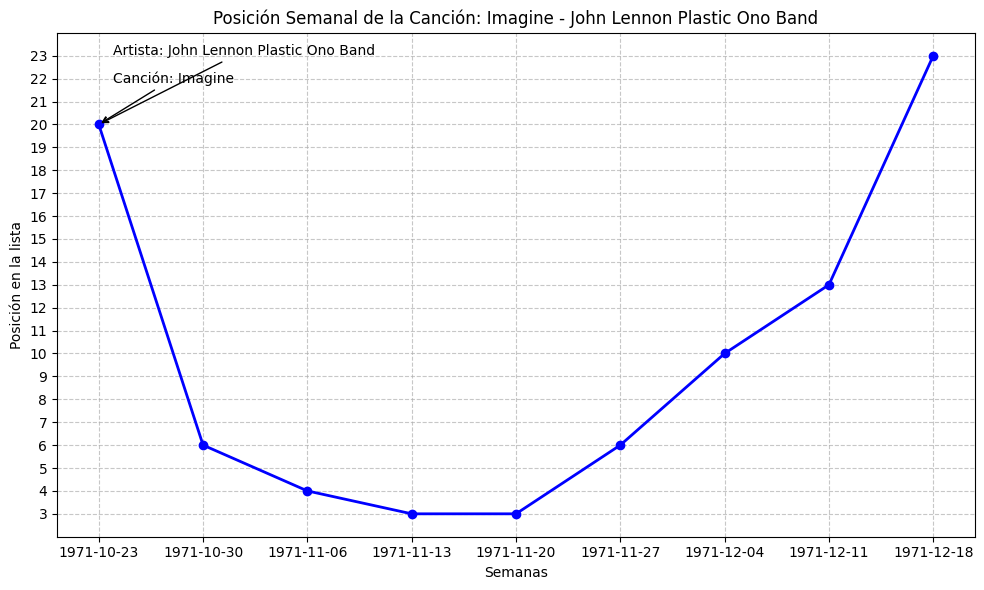

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar datos desde el archivo CSV
data = pd.read_csv('./data/billboard.csv')

# Especificar la canción y el artista
cancion_seleccionada = 'Imagine'
artist_seleccionado = 'John Lennon Plastic Ono Band'

# Filtrar los datos para la canción y el artista seleccionados
datos_cancion = data[(data['Song'] == cancion_seleccionada) & (data['Artist'] == artist_seleccionado)]

# Crear gráfico de líneas con estilo y colores mejorados
plt.figure(figsize=(10, 6))
plt.plot(datos_cancion['WeekID'], datos_cancion['Week Position'], label='Posición Semanal', marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Semanas')
plt.ylabel('Posición en la lista')
plt.title(f'Posición Semanal de la Canción: {cancion_seleccionada} - {artist_seleccionado}')
plt.annotate('Canción: ' + cancion_seleccionada,
             xy=(datos_cancion['WeekID'].iloc[0], datos_cancion['Week Position'].iloc[0]),
             xycoords='data',
             xytext=(10, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
plt.annotate('Artista: ' + artist_seleccionado,
             xy=(datos_cancion['WeekID'].iloc[0], datos_cancion['Week Position'].iloc[0]),
             xycoords='data',
             xytext=(10, 50),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

# Establecer los ticks del eje y como enteros
plt.yticks(np.arange(min(datos_cancion['Week Position']), max(datos_cancion['Week Position']) + 1, 1).astype(int))

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mejorar el diseño
plt.tight_layout()

plt.show()

**Gráfico de líneas para tendencias temporales:**

Un gráfico de líneas que muestra la posición semanal de una canción en función de la semana (WeekID).

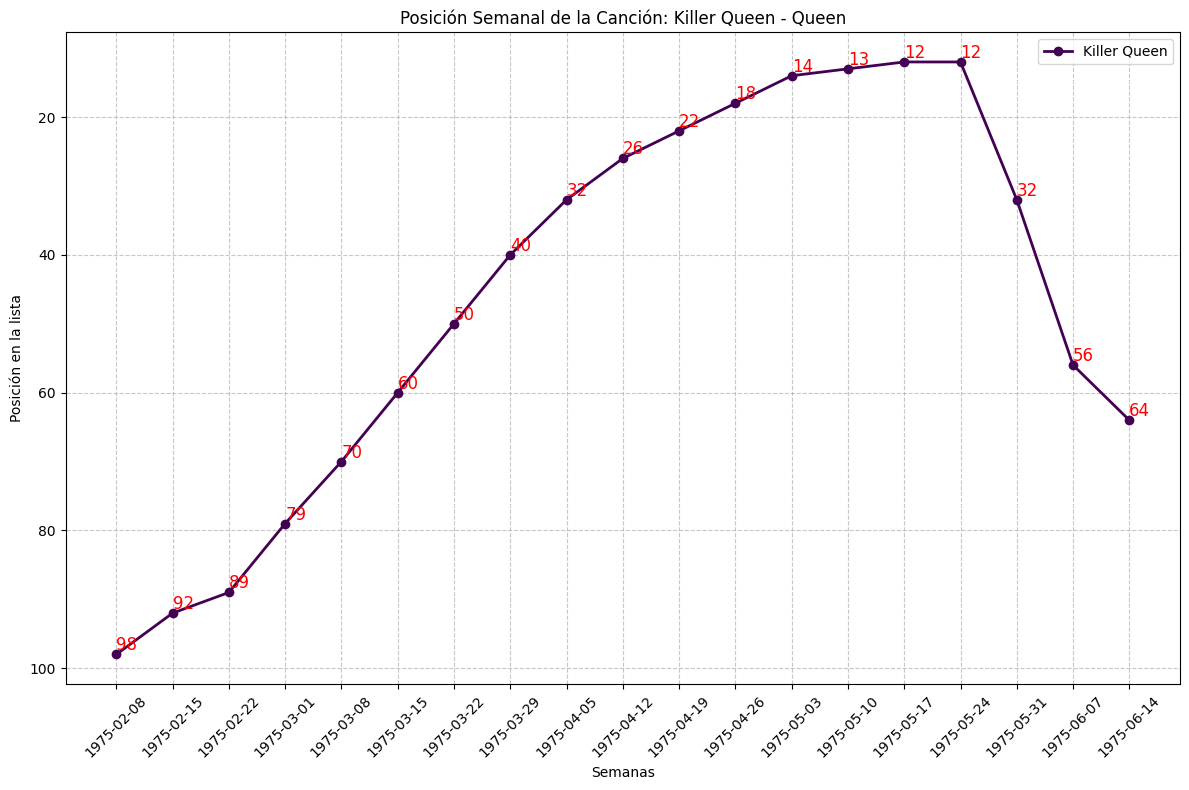

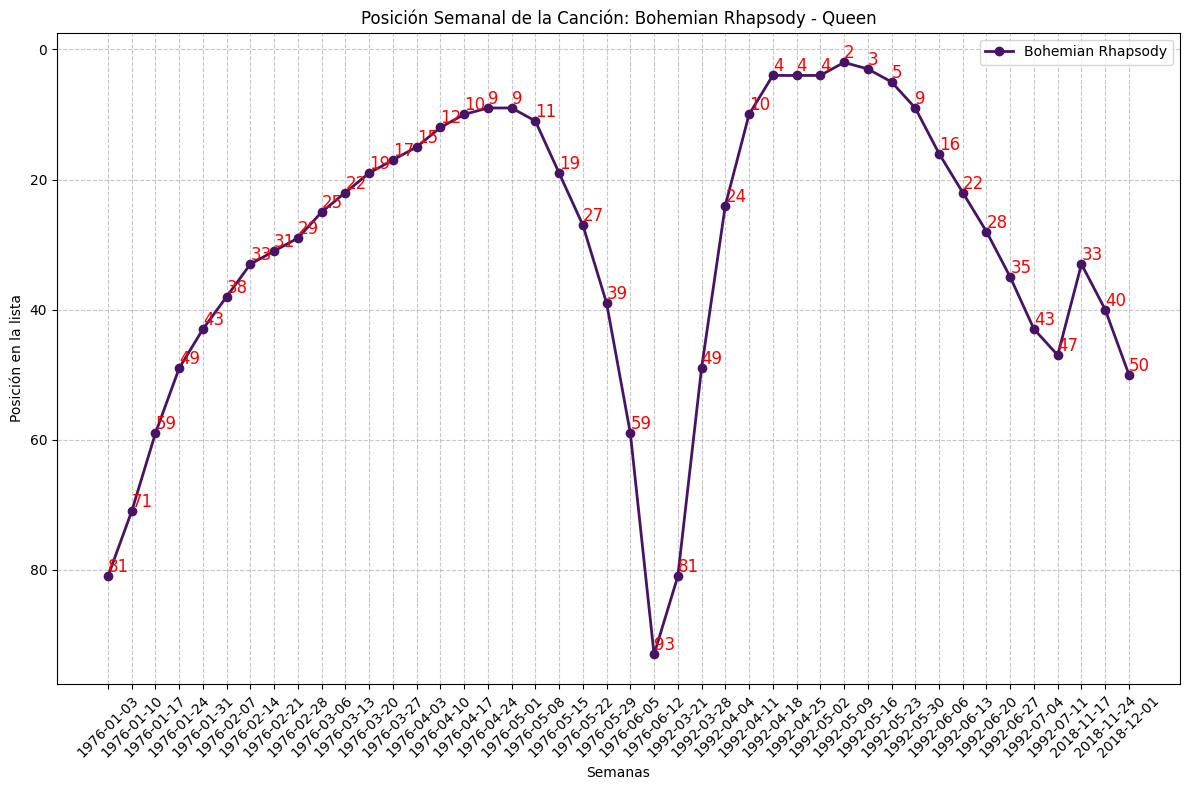

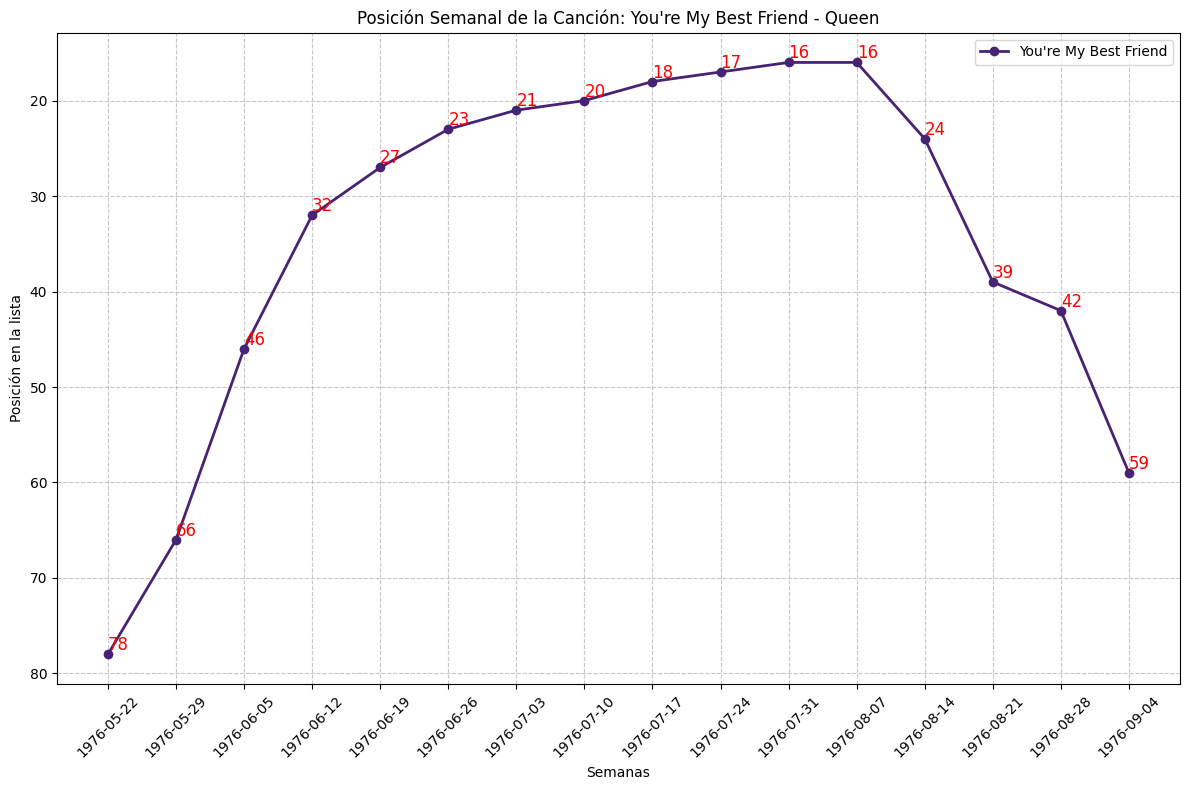

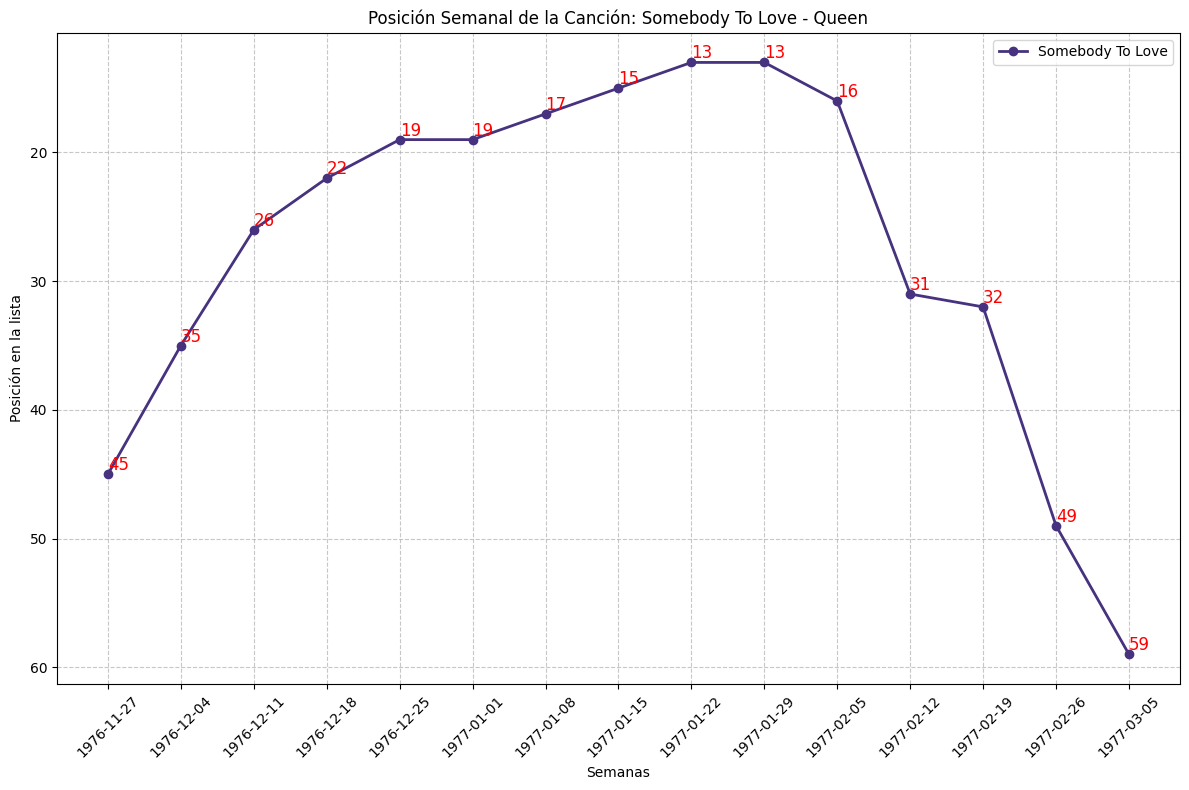

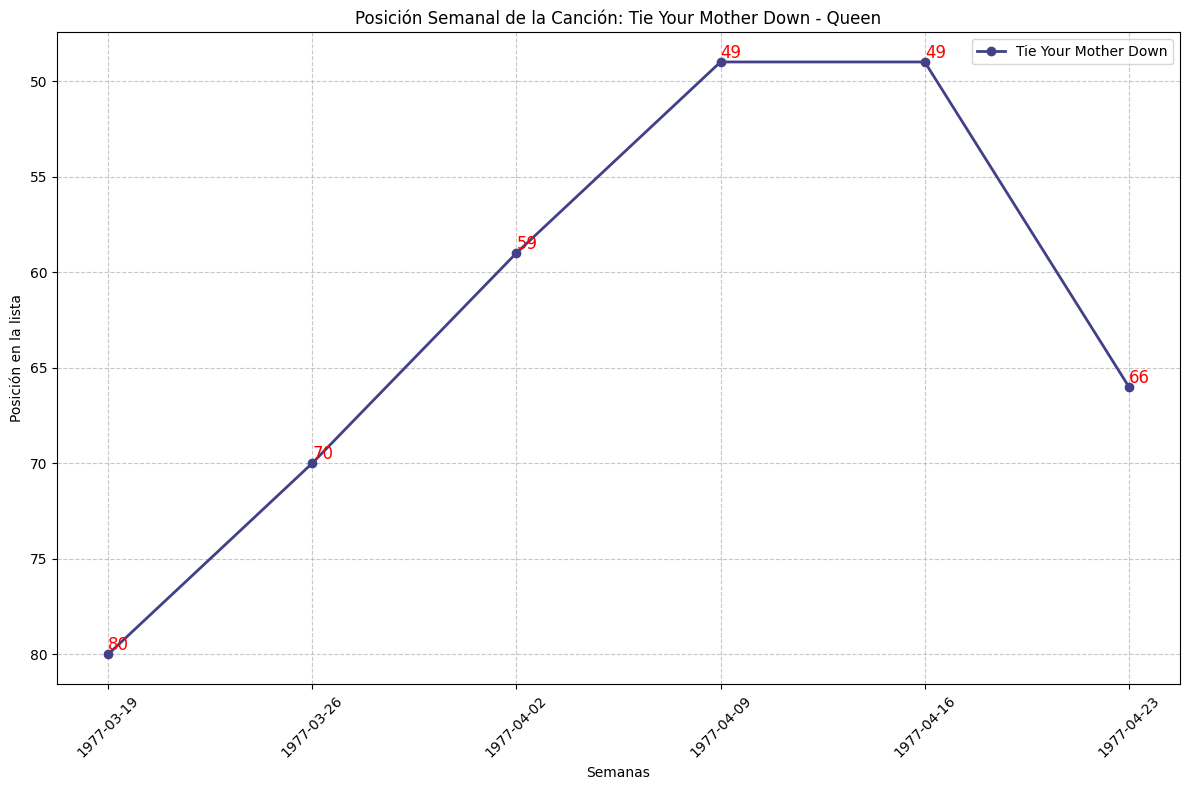

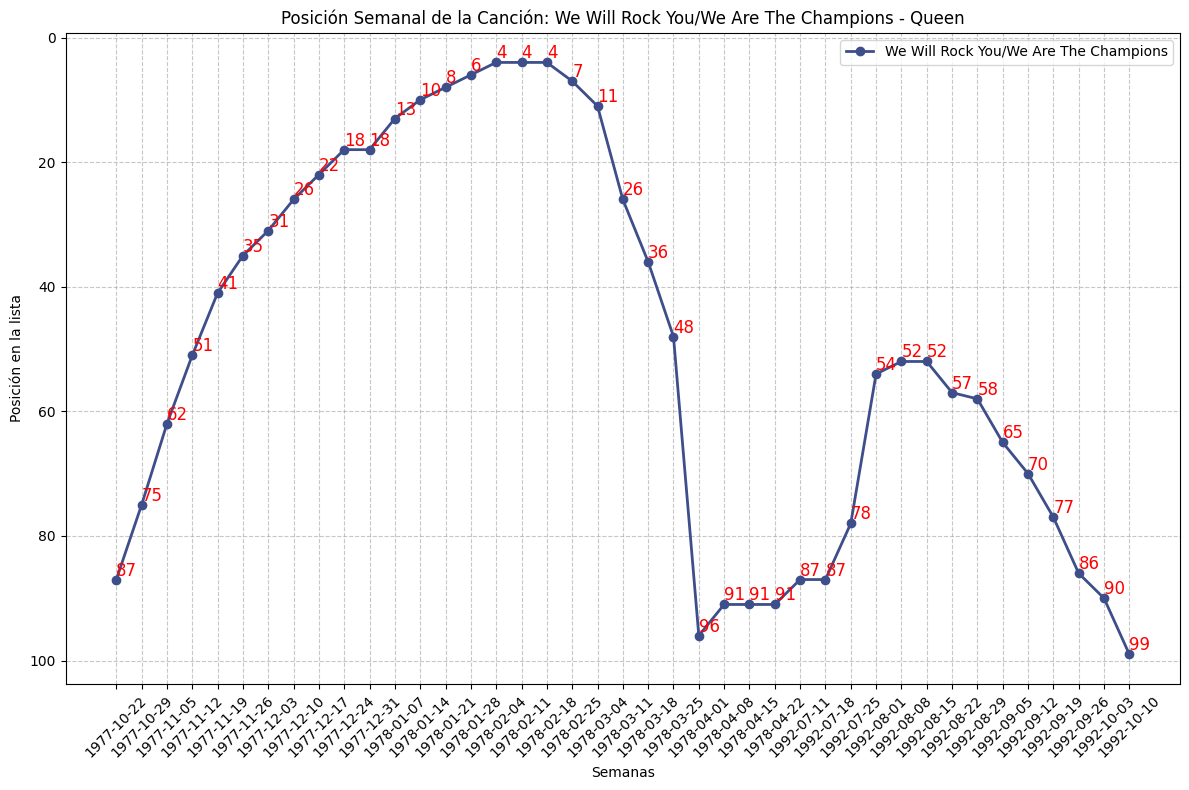

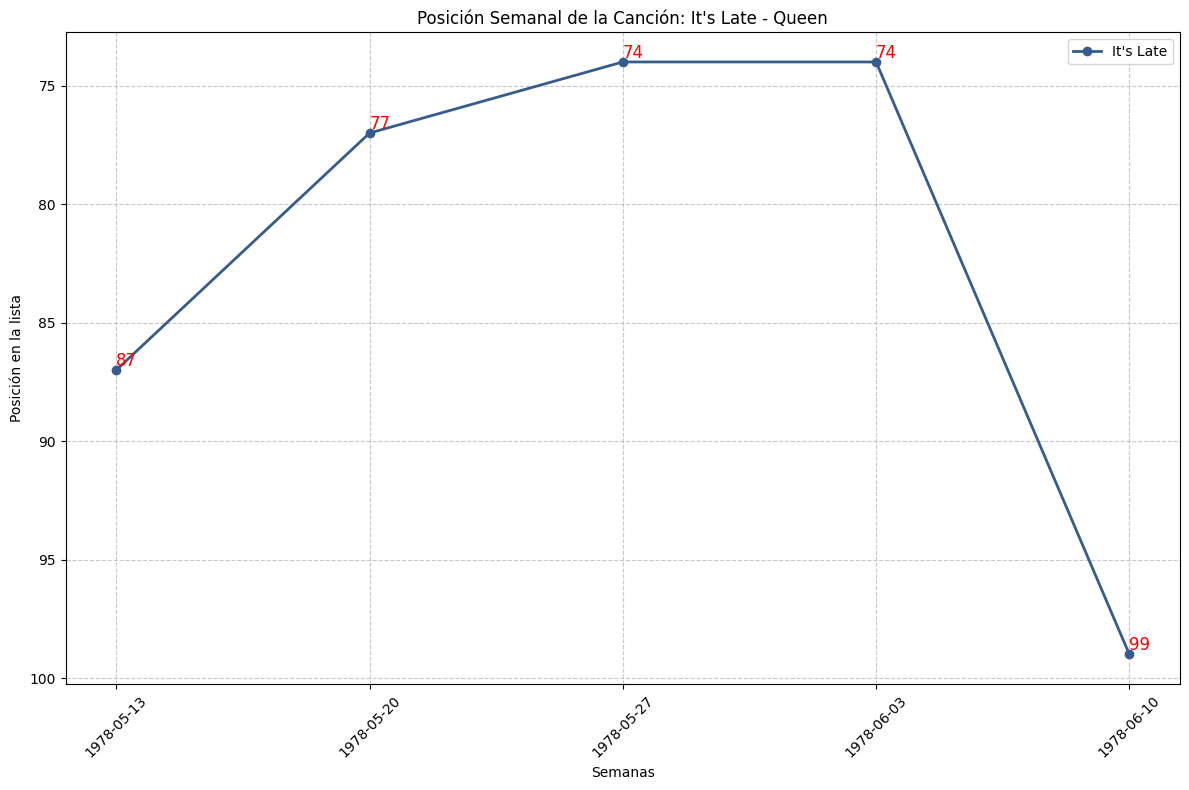

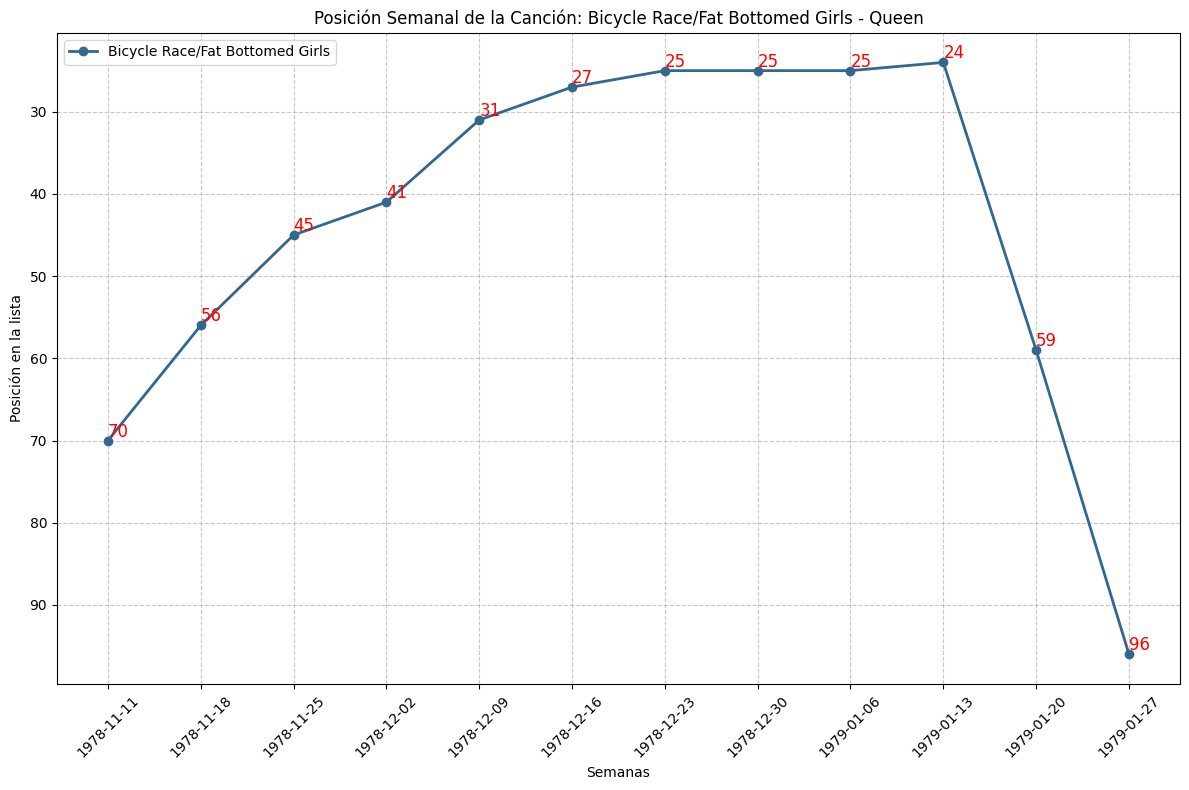

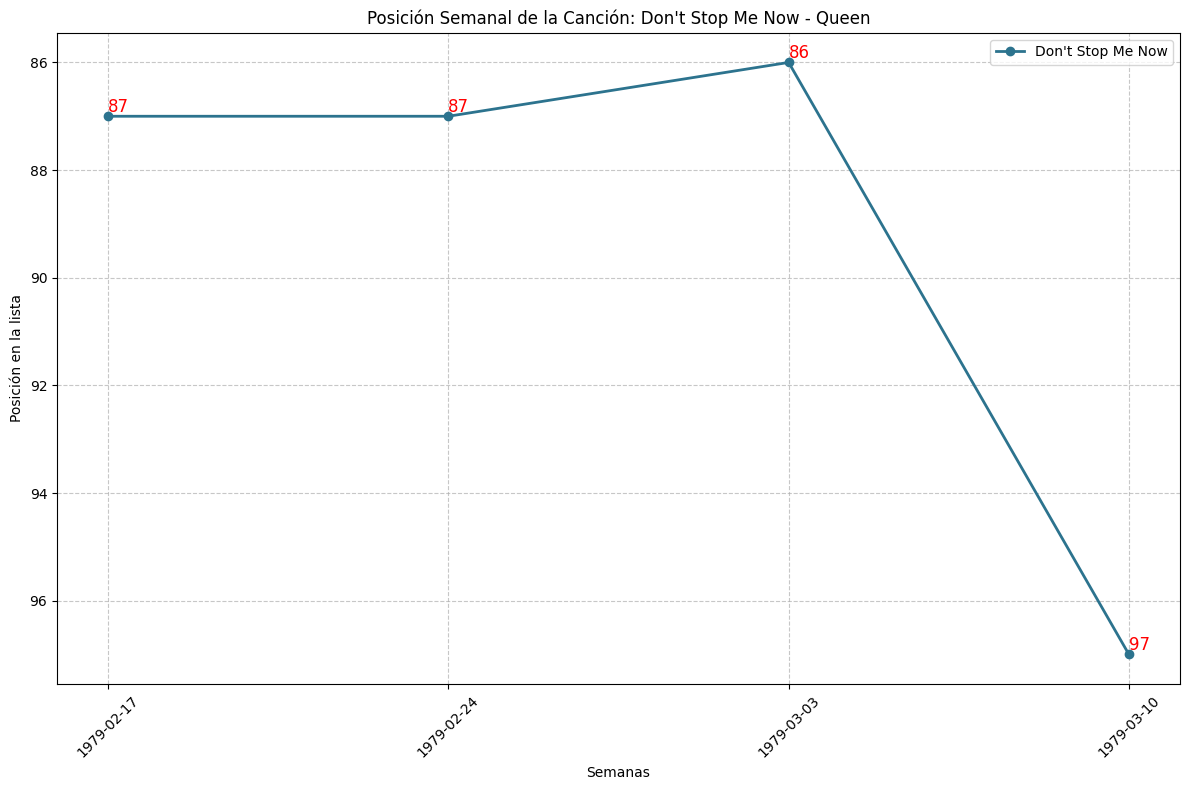

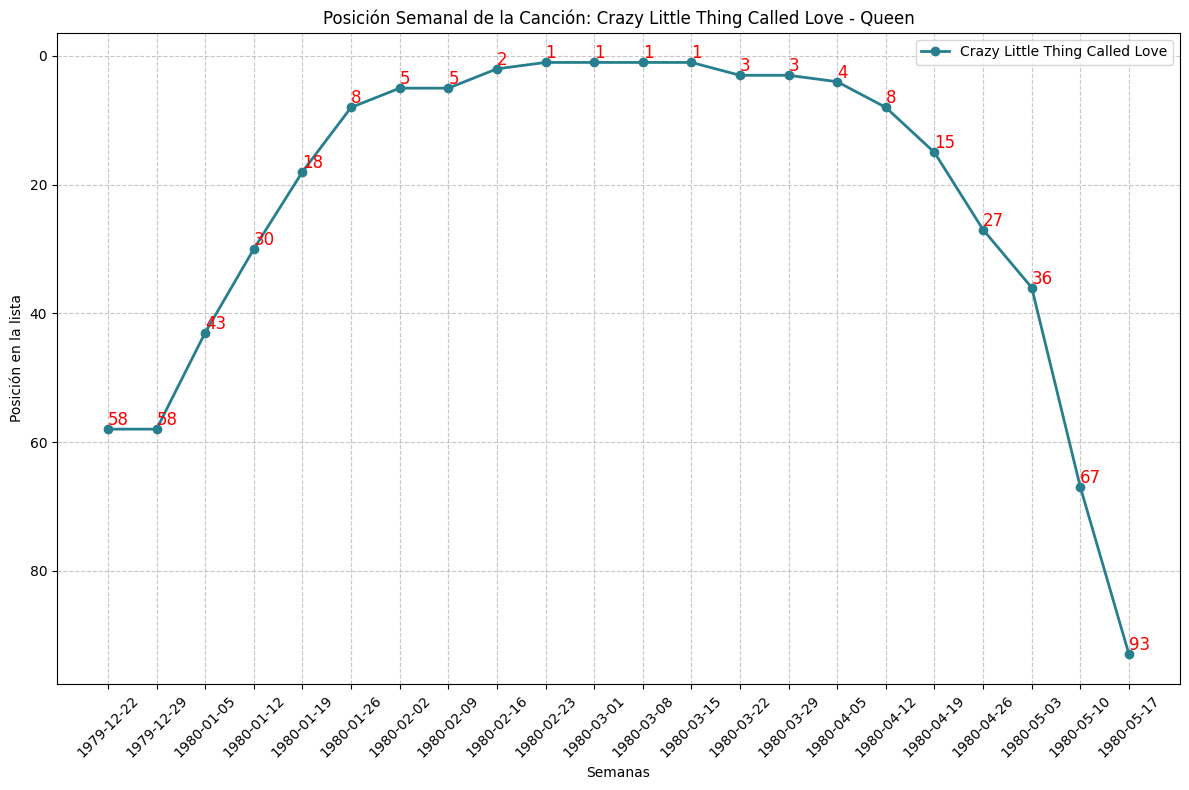

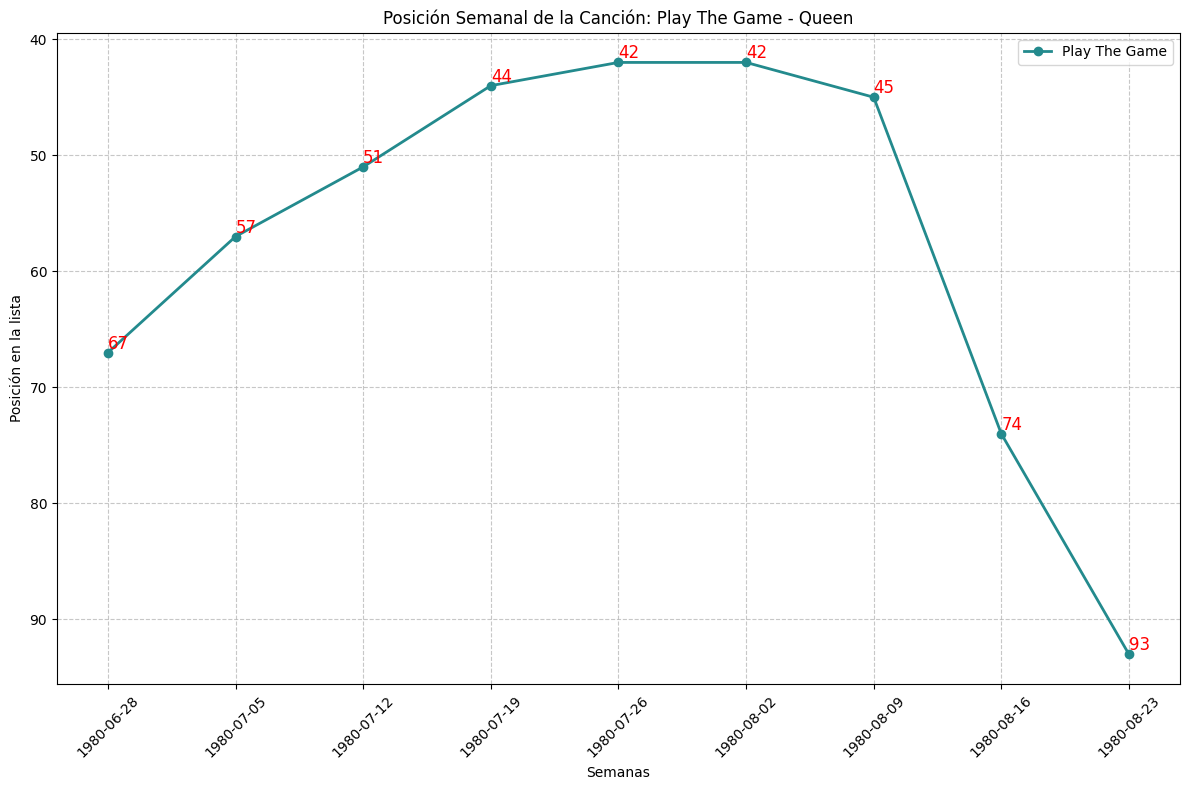

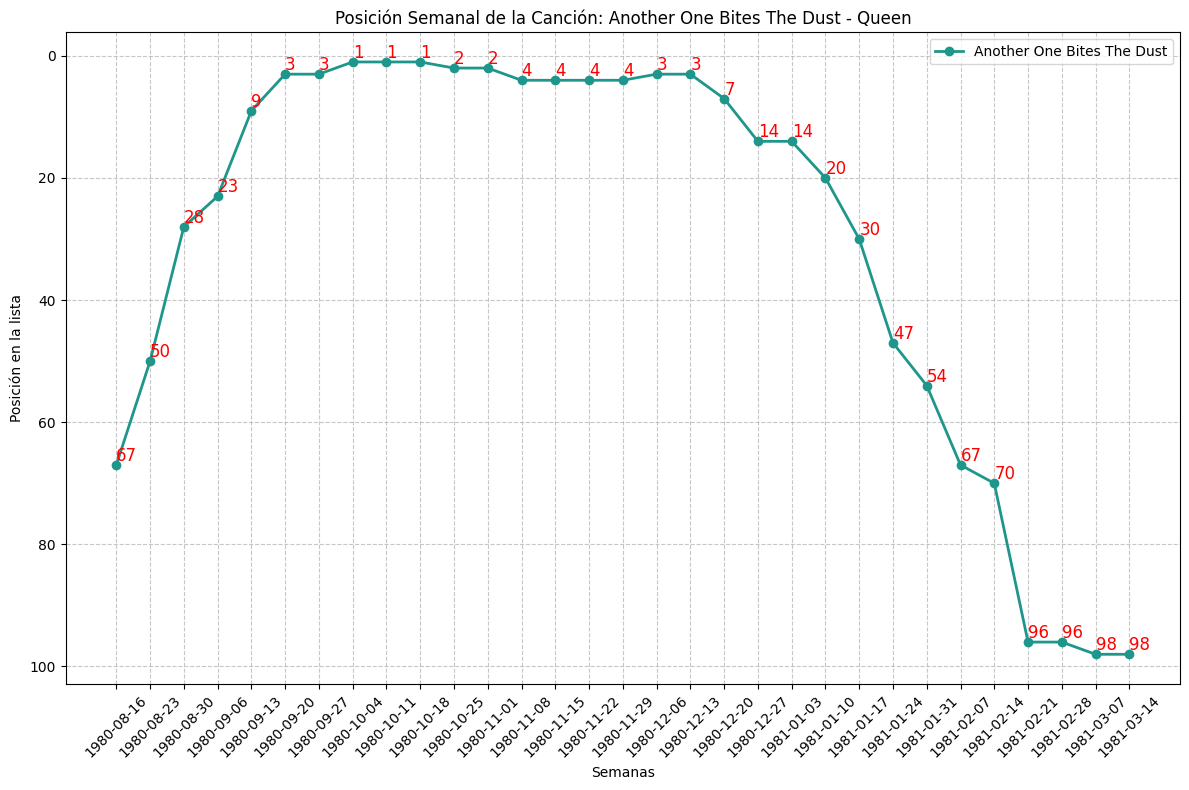

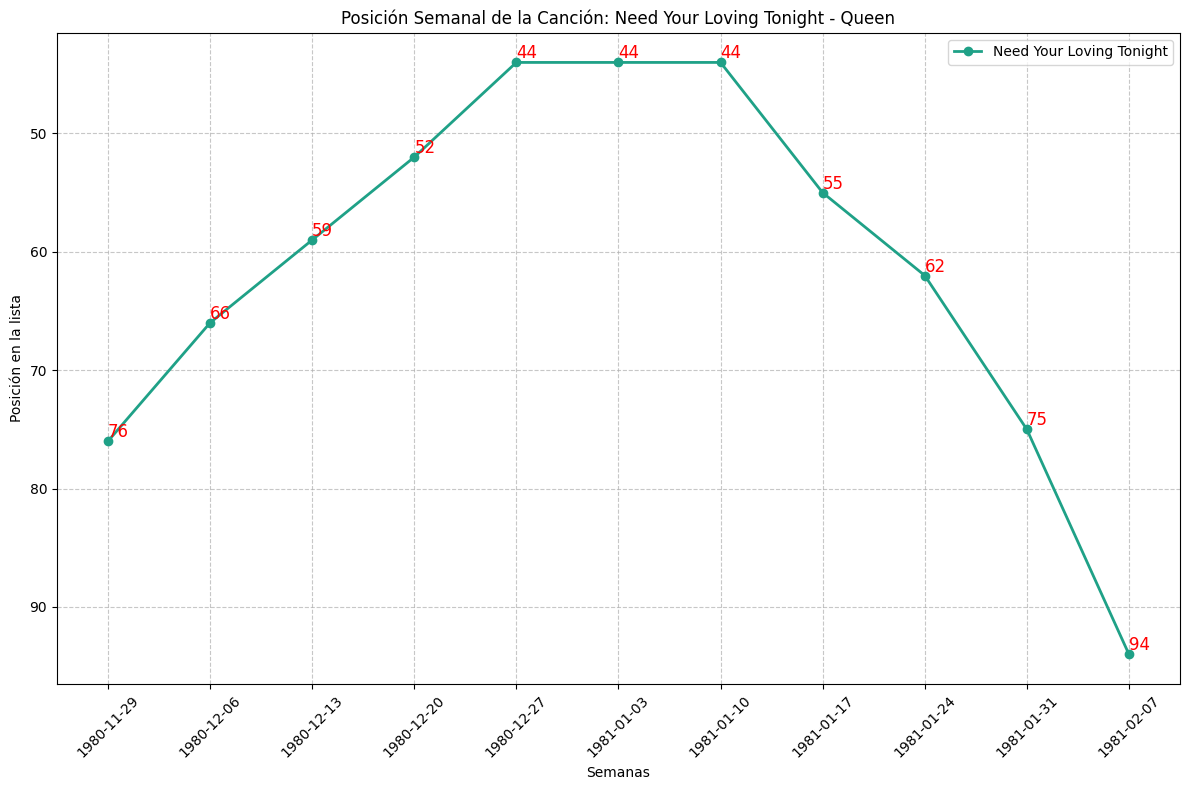

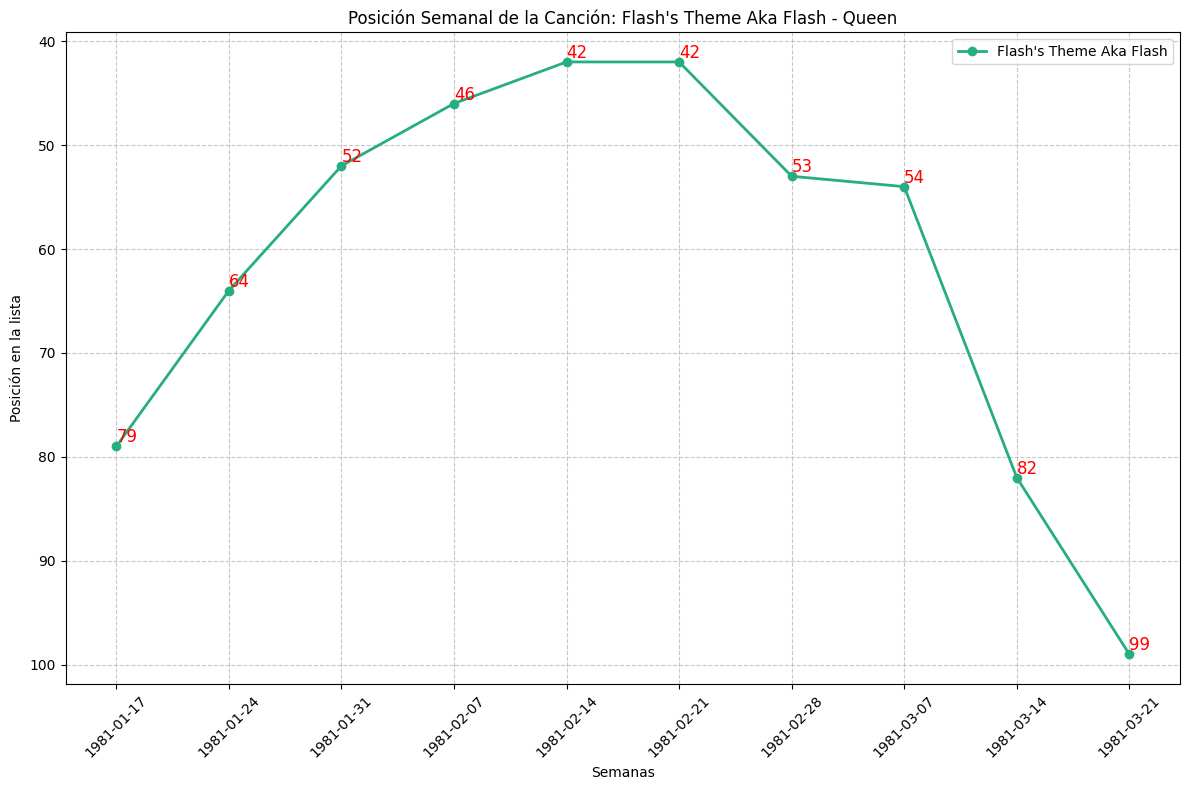

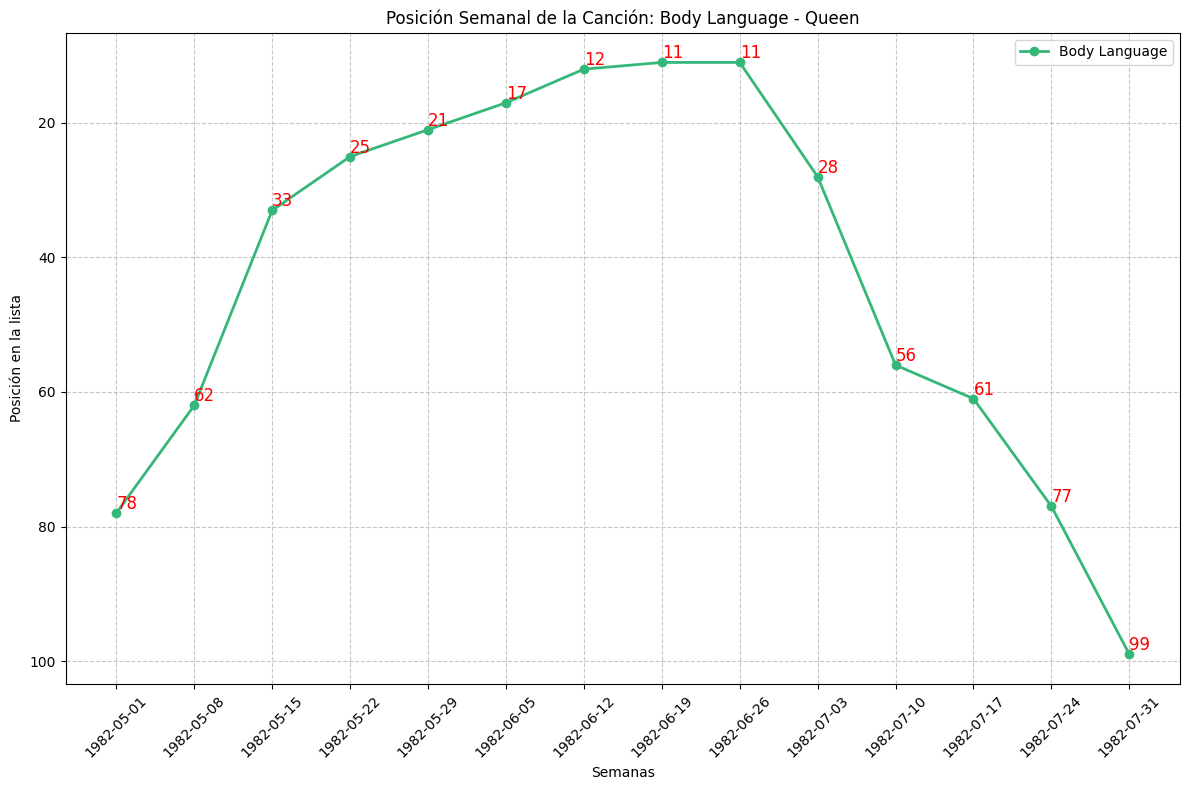

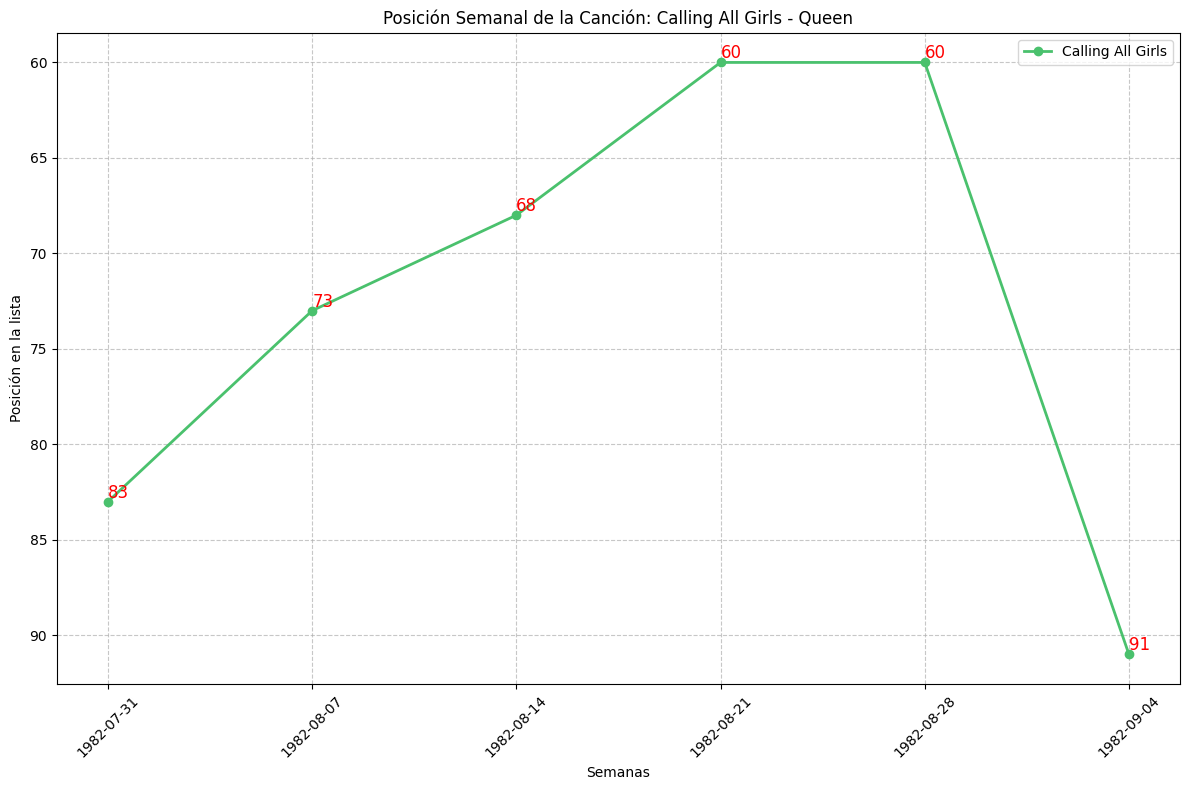

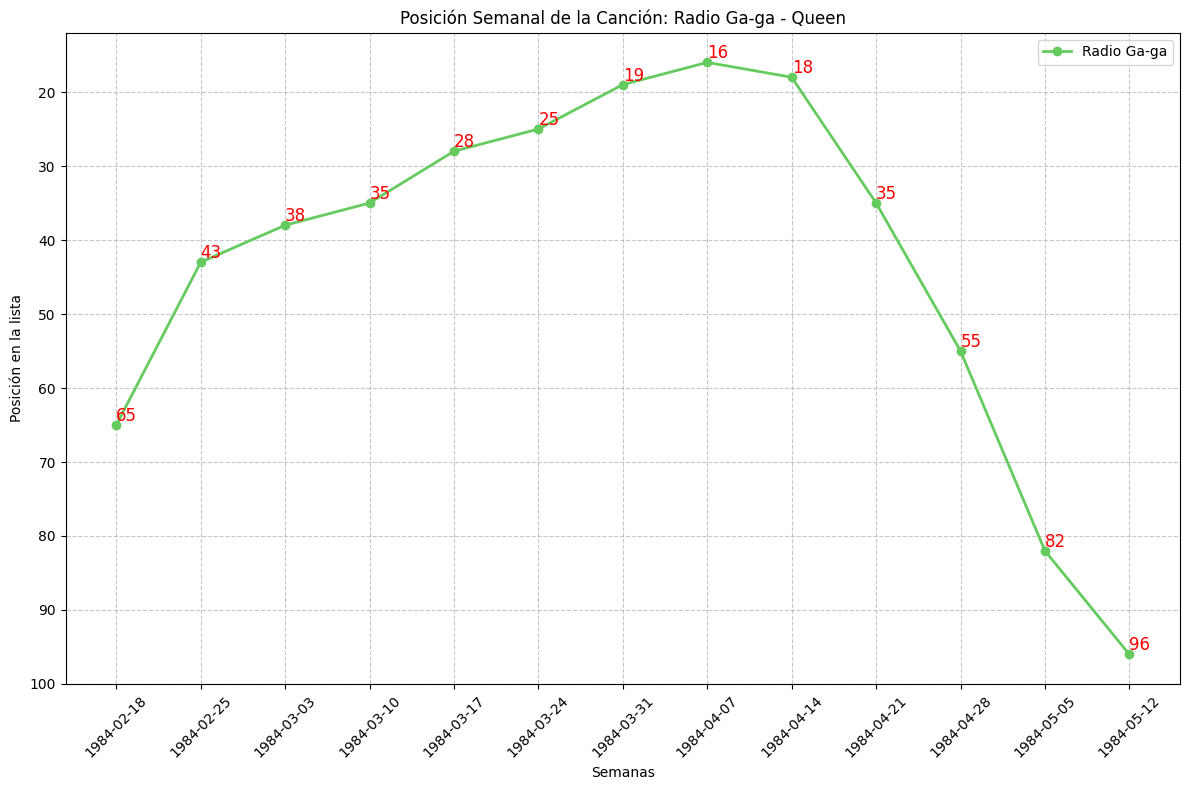

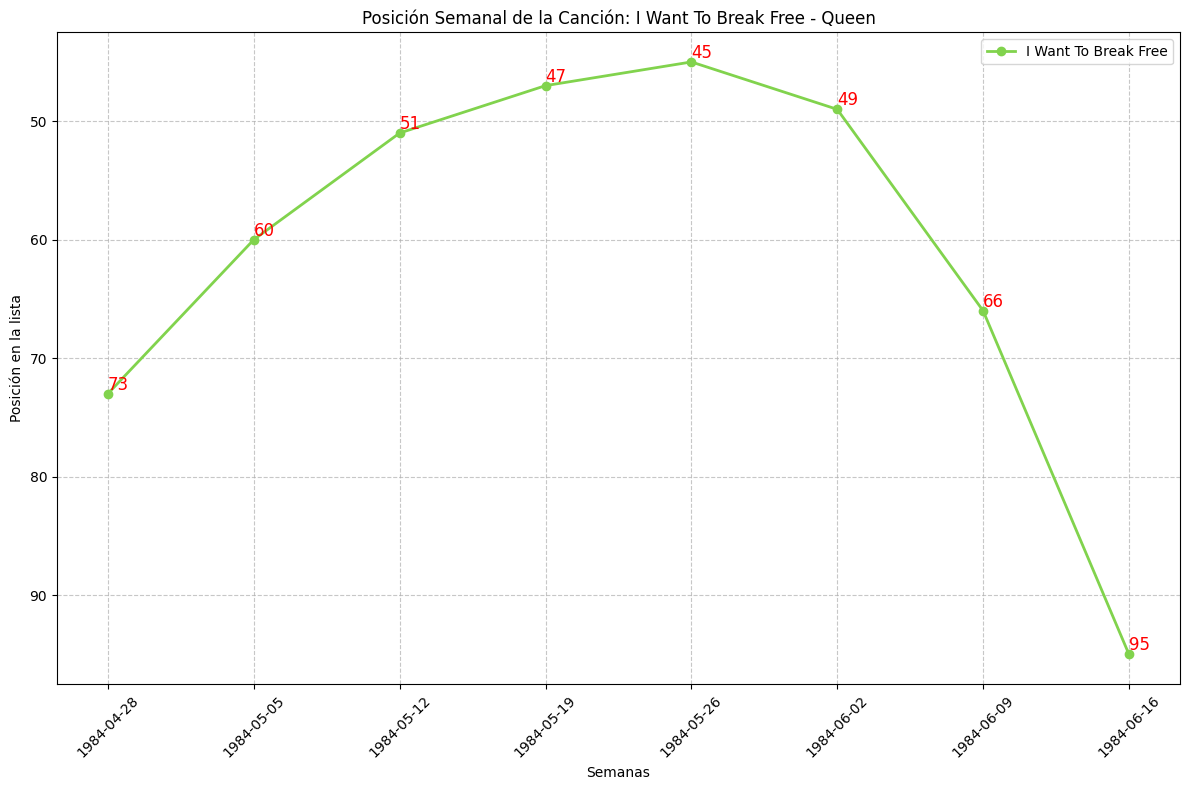

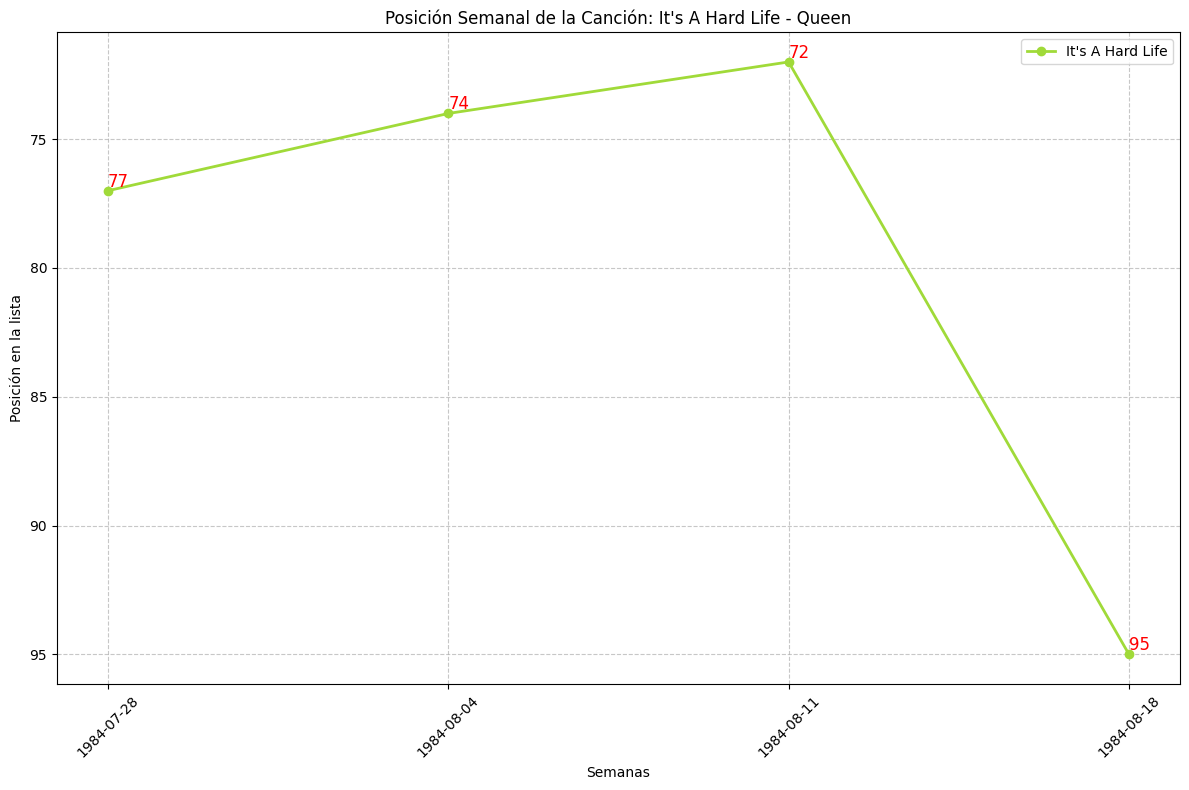

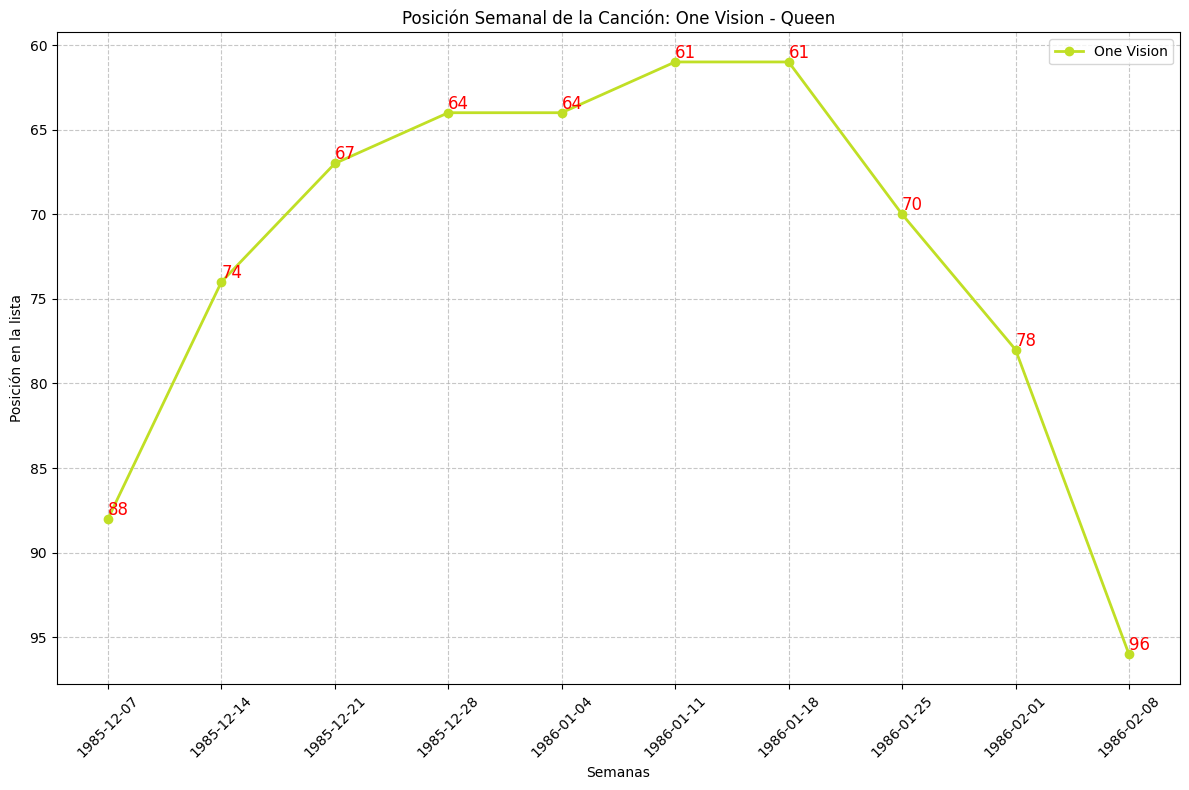

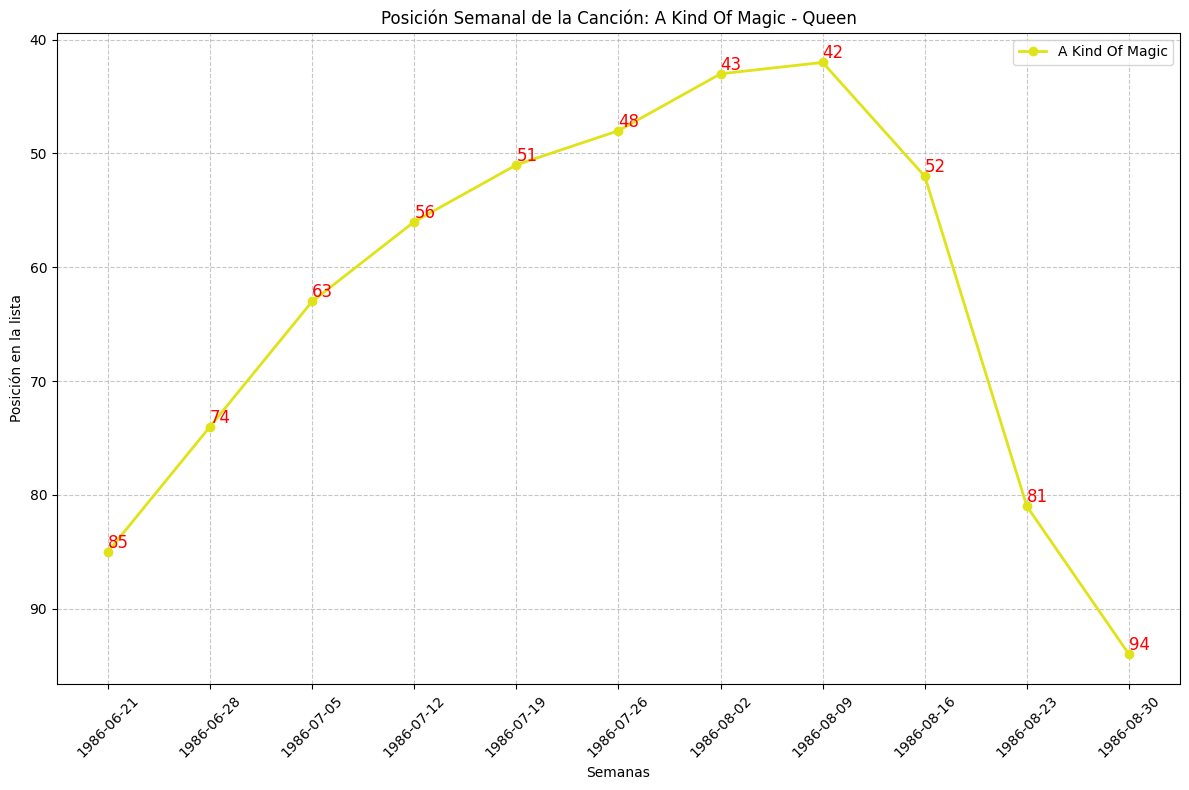

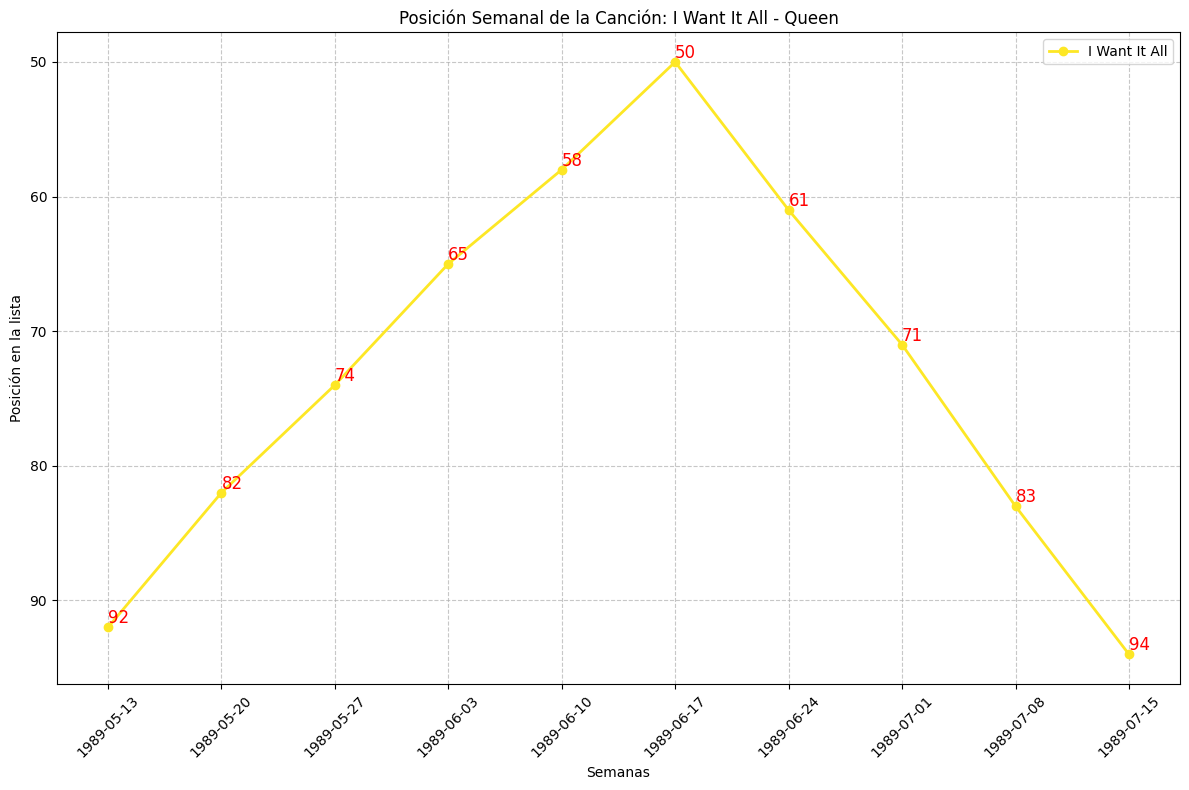

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar datos desde el archivo CSV
data = pd.read_csv('./data/billboard.csv')

# Especificar el artista
artist_seleccionado = 'Queen'

# Filtrar los datos para el artista seleccionado
datos_artista = data[data['Artist'] == artist_seleccionado]

# Obtener la lista de canciones del artista
canciones_artista = datos_artista['Song'].unique()

# Colores para las líneas
colores = plt.cm.viridis(np.linspace(0, 1, len(canciones_artista)))

# Iterar sobre cada canción y crear una gráfica para cada una
for i, cancion_seleccionada in enumerate(canciones_artista):
    datos_cancion = datos_artista[datos_artista['Song'] == cancion_seleccionada]
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(datos_cancion['WeekID'], datos_cancion['Week Position'], marker='o', linestyle='-', linewidth=2, label=cancion_seleccionada, color=colores[i])
    
    # Etiquetar cada punto con su valor en el eje y
    for i in range(len(datos_cancion)):
        plt.text(datos_cancion['WeekID'].iloc[i], datos_cancion['Week Position'].iloc[i], 
                 str(datos_cancion['Week Position'].iloc[i]), 
                 ha='left', va='bottom', fontsize=12, color='red')  # Cambios aquí
    
    plt.xlabel('Semanas')
    plt.ylabel('Posición en la lista')
    plt.title(f'Posición Semanal de la Canción: {cancion_seleccionada} - {artist_seleccionado}')
    
    # Establecer la rotación de los valores del eje x
    plt.xticks(rotation=45)
    
    # Agregar cuadrícula
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Mostrar los valores de corte del eje x en el eje y
    plt.gca().invert_yaxis()
    
    # Ajustar el diseño
    plt.tight_layout()
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()

## **Top 10 Artistas en la Lista de Billboard (por Peak Position)**

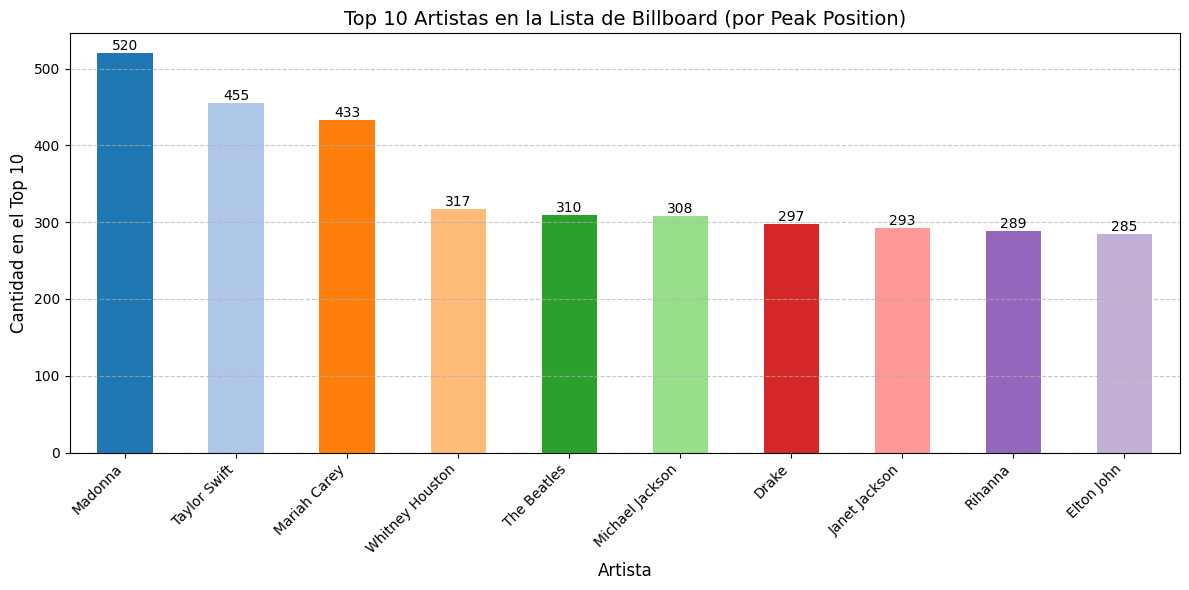

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos desde el archivo CSV
data = pd.read_csv('./data/billboard.csv')

# Filtrar datos para posiciones <= 10
top_10_data = data[data['Peak Position'] <= 10]

# Contar la cantidad de veces que aparece cada artista en el top 10
top_10_counts = top_10_data['Artist'].value_counts().head(10)

# Colores personalizados
colors = plt.cm.tab20.colors[:10]

# Crear gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
top_10_counts.plot(kind='bar', color=colors)

# Personalizar título y etiquetas de los ejes
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Cantidad en el Top 10', fontsize=12)
plt.title('Top 10 Artistas en la Lista de Billboard (por Peak Position)', fontsize=14)

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Añadir una rejilla de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar el valor en la parte superior de cada barra
for i, count in enumerate(top_10_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

# Mostrar la gráfica
plt.tight_layout()
plt.show()